# K-means实验

用pandas读取啤酒数据集`e2.0_beer.txt`。

In [29]:
# beer dataset
import pandas as pd
url = 'e2.0_beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

name  calories  sodium  alcohol  cost
0              Budweiser       144      15      4.7  0.43
1                Schlitz       151      19      4.9  0.43
2              Lowenbrau       157      15      0.9  0.48
3            Kronenbourg       170       7      5.2  0.73
4               Heineken       152      11      5.0  0.77
5          Old_Milwaukee       145      23      4.6  0.28
6             Augsberger       175      24      5.5  0.40
7   Srohs_Bohemian_Style       149      27      4.7  0.42
8            Miller_Lite        99      10      4.3  0.43
9        Budweiser_Light       113       8      3.7  0.40
10                 Coors       140      18      4.6  0.44
11           Coors_Light       102      15      4.1  0.46
12        Michelob_Light       135      11      4.2  0.50
13                 Becks       150      19      4.7  0.76
14                 Kirin       149       6      5.0  0.79
15     Pabst_Extra_Light        68      15      2.3  0.38
16                 Hamms       139      19      4.4  0.43
17   Heilemans_Old_Style       144      24      4.9  0.43
18   Olympia_Goled_Light        72       6      2.9  0.46
19         Schlitz_Light        97       7      4.2  0.47

去掉`name`项，保留`calories`、`sodium`、`alcohol`和`cost`数据，作为特征`X`。

In [30]:
# define X
X = beer.drop('name', axis=1)

建立K-means聚类器，使类别数为3，并进行数据拟合。

In [31]:
# K-means with 3 clusters
# 注意使K-means聚类器的对象名称为 km
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)


KMeans(n_clusters=3)

将聚类结果传递给pandas数据框，并按类别排序，查看各个啤酒参与聚类的结果。

In [32]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_
beer.sort_values(by='cluster')

name  calories  sodium  alcohol  cost  cluster
9        Budweiser_Light       113       8      3.7  0.40        0
11           Coors_Light       102      15      4.1  0.46        0
8            Miller_Lite        99      10      4.3  0.43        0
19         Schlitz_Light        97       7      4.2  0.47        0
4               Heineken       152      11      5.0  0.77        1
5          Old_Milwaukee       145      23      4.6  0.28        1
6             Augsberger       175      24      5.5  0.40        1
7   Srohs_Bohemian_Style       149      27      4.7  0.42        1
2              Lowenbrau       157      15      0.9  0.48        1
10                 Coors       140      18      4.6  0.44        1
1                Schlitz       151      19      4.9  0.43        1
12        Michelob_Light       135      11      4.2  0.50        1
13                 Becks       150      19      4.7  0.76        1
14                 Kirin       149       6      5.0  0.79        1
16                 Hamms       139      19      4.4  0.43        1
17   Heilemans_Old_Style       144      24      4.9  0.43        1
3            Kronenbourg       170       7      5.2  0.73        1
0              Budweiser       144      15      4.7  0.43        1
18   Olympia_Goled_Light        72       6      2.9  0.46        2
15     Pabst_Extra_Light        68      15      2.3  0.38        2

查看聚类结果中各个簇的中心点坐标

In [33]:
# review the cluster centers
km.cluster_centers_

array([[102.75      ,  10.        ,   4.075     ,   0.44      ],
       [150.        ,  17.        ,   4.52142857,   0.52071429],
       [ 70.        ,  10.5       ,   2.6       ,   0.42      ]])

用pandas查看各类别样本的坐标均值，并回答是否和先前计算相同？

答：

In [34]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

/tmp/ipykernel_50398/58857758.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beer.groupby('cluster').mean()


calories  sodium   alcohol      cost
cluster                                      
0          102.75    10.0  4.075000  0.440000
1          150.00    17.0  4.521429  0.520714
2           70.00    10.5  2.600000  0.420000

In [35]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()

/tmp/ipykernel_50398/1501469021.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  centers = beer.groupby('cluster').mean()


聚类结果可视化

> **要求**： 请运行、阅读和理解以下程序，并通过添加`注释`或者`markdown cell`，以说明每段代码的功能。

In [36]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
# set the font size
plt.rcParams['font.size'] = 14


In [37]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'alcohol')

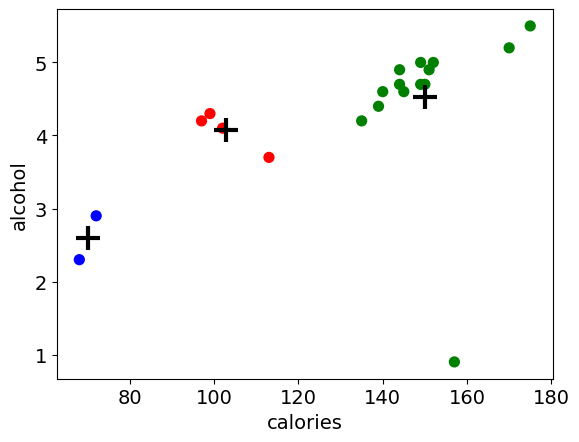

In [38]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

In [39]:
# calculate SC for K=3
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
metrics.silhouette_score(X_scaled, km.labels_)

0.19454664171120434

In [40]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

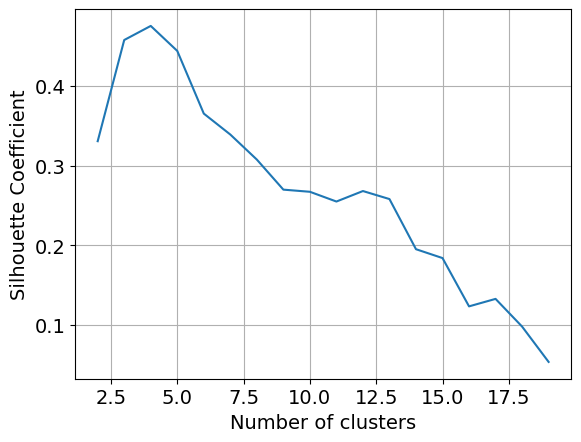

In [41]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

# PCA实验

请使用PCA算法将前文中的啤酒数据`X`降维到2维空间，并绘制出降维之后的数据点，并且计算降维导致的重建误差。

参见：[PCA算法文档](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

> 提示：着重看文档中的示例Examples

[-11.41071341 -18.7563276  -24.2856944  -36.55439065 -19.00636267
 -13.15190363 -43.12530515 -17.5095788   33.85968231  20.12053057
  -7.70749236  30.40940729  -2.06904    -17.75787186 -15.55267904
  64.28684296  -6.80198502 -12.25534761  61.13554293  36.13268615]


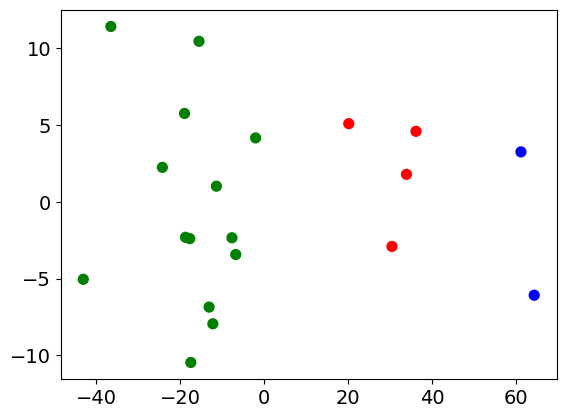

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[beer.cluster], s=50)
